In [4]:
# 필수 패키지 가져오기
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset

In [5]:
csvPath ='/content/non_linear.csv'

In [6]:
# 데이터가 200개이고 x,y컬럼이 존재
df = pd.read_csv(csvPath)
df.head()

,x,y
0,-10.0,327.79
1,-9.9,321.39
2,-9.8,314.48
3,-9.7,308.51
4,-9.6,302.86


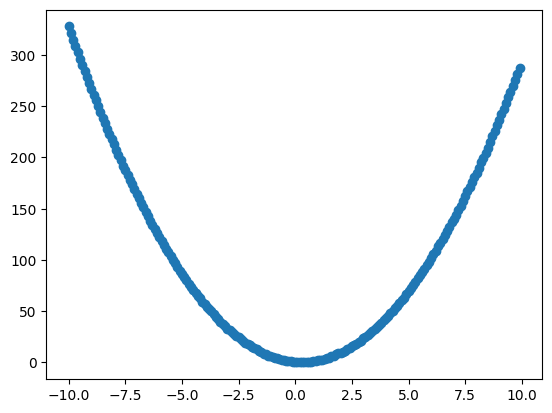

In [7]:
# 그래프를 그려보자
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])
plt.show()

In [8]:
# 사용자정의 데이터셋 클래스 생성
class CustomDataset(Dataset):

    def __init__(self, csv_path):
        df = pd.read_csv(csv_path)
        self.x = df['x'].values
        self.y = df['y'].values
        self.length = len(df)

    def __getitem__(self, index):
        # custom polynorminal_features
        x = torch.FloatTensor([self.x[index]**2,self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

In [9]:
train_dataset = CustomDataset(csvPath)
train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True, drop_last=True)

In [10]:
# custom Model을 구현
class CustomModel(nn.Module):
    def __init__(self):
        # nn.Module클래스 초기화
        super().__init__()
        # x, x**2 두 개 컬럼 입력으로 사용
        self.layer = nn.Linear(2,1)

    def forward(self, x):
        return self.layer(x)

In [11]:
learning_rate = 0.0001
epochs = 20000

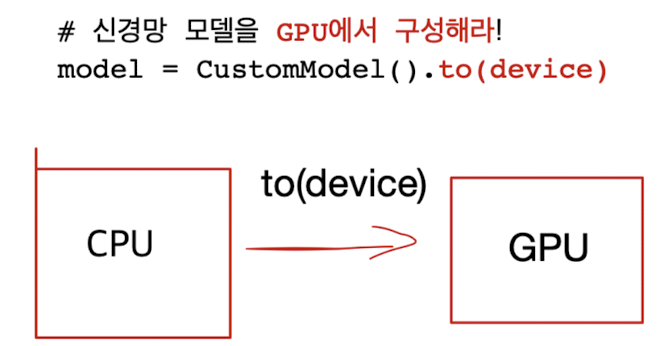

In [12]:
# pytorch에서 사용할 수 있는 장치를 확인, 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 모델 설정 -> GPU
model = CustomModel().to(device)

# 손실함수 설정
criterion = nn.MSELoss().to(device)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# torch 난수를 고정한다.
torch.manual_seed(1)

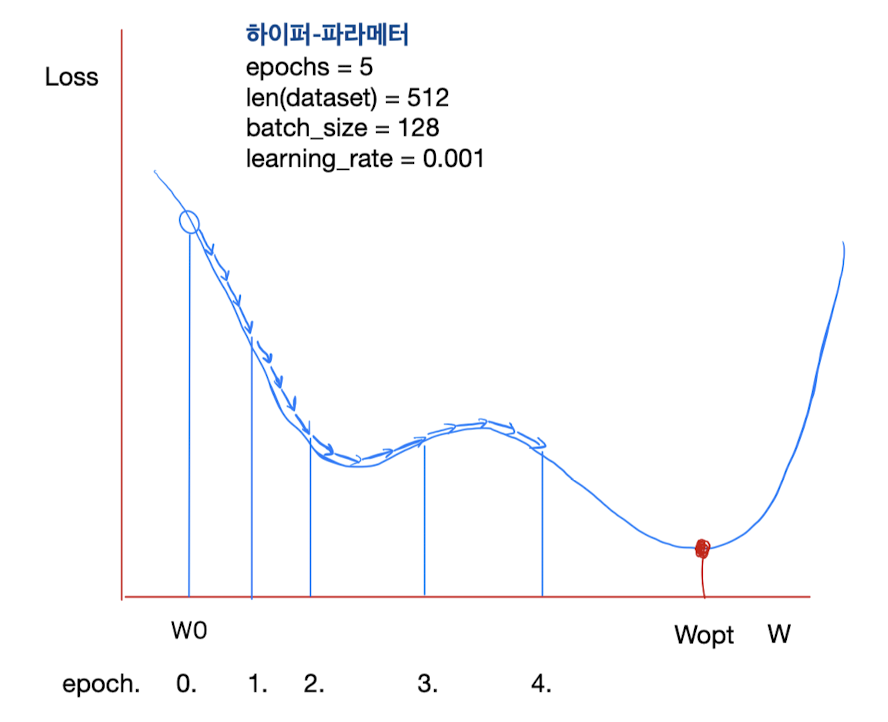

In [19]:

for epoch in range(epochs):
    cost=0.0

    for x,y in train_dataloader:
        # Device가 cuda가 되면 CPU -> GPU로 데이터 전송
        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, Cost: {cost}')

Epoch: 0, Cost: 0.07609003782272339
Epoch: 500, Cost: 0.07637137174606323
Epoch: 1000, Cost: 0.0757354125380516
Epoch: 1500, Cost: 0.07601352035999298
Epoch: 2000, Cost: 0.0757799819111824
Epoch: 2500, Cost: 0.07555375248193741
Epoch: 3000, Cost: 0.07552467286586761
Epoch: 3500, Cost: 0.07558215409517288
Epoch: 4000, Cost: 0.07557644695043564
Epoch: 4500, Cost: 0.07569330930709839
Epoch: 5000, Cost: 0.0757310688495636
Epoch: 5500, Cost: 0.07545523345470428
Epoch: 6000, Cost: 0.07559236884117126
Epoch: 6500, Cost: 0.07544536888599396
Epoch: 7000, Cost: 0.07592175900936127
Epoch: 7500, Cost: 0.07548733800649643
Epoch: 8000, Cost: 0.07562814652919769
Epoch: 8500, Cost: 0.07539628446102142
Epoch: 9000, Cost: 0.07544221729040146
Epoch: 9500, Cost: 0.0755402147769928
Epoch: 10000, Cost: 0.07561248540878296
Epoch: 10500, Cost: 0.07601151615381241
Epoch: 11000, Cost: 0.07573787868022919
Epoch: 11500, Cost: 0.07539185881614685
Epoch: 12000, Cost: 0.07566717267036438
Epoch: 12500, Cost: 0.075621

In [15]:
y_pred[:5],y[:5]

(tensor([[ 3.4901],
         [29.5429],
         [25.8535],
         [ 0.9287],
         [86.4990]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([[ 3.3000],
         [29.2000],
         [26.2000],
         [ 1.0400],
         [86.2900]], device='cuda:0'))

In [16]:
with torch.no_grad():
    # 평가 모드로 전환
    model.eval()
    # 테스트용 데이터셋을 설정
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.8610],
        [ 69.4537],
        [356.8569]], device='cuda:0')


In [17]:
import os

os.makedirs("./models", exist_ok=True)
torch.save(model,"./models/model.pt")

In [18]:
torch.save(model.state_dict(),"./models/model_state_dict.pt")